# Drifter Chain SBE39 Processing

In [1]:
from pathlib import Path
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr
import gsw
import gvpy as gv

%reload_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'

In [2]:
data_path = Path("/Users/gunnar/Projects/nesma/drifter/data/drifter_chain_2024_05")

In [3]:
ncstr_1_day_test = "drifter_tchain_2024_05_13"
raw_sbe39 = data_path.joinpath("sbe39/raw/sbe39_1102_no_header.asc")

In [4]:
# Define a custom parsing function to handle the specific format
def parse_line(line):
  # Split the line by commas, handling extra spaces
  data = line.strip().split(',')

  # Convert the date and time part into a datetime object
  date_time_str = data[2].strip() + ' ' + data[3].strip()
  date_time = pd.to_datetime(date_time_str)

  # Convert the first two values (assuming they are numerical) to floats
  values = [float(val.strip()) for val in data[:2]]

  # Create a dictionary with keys matching column names and extracted values
  parsed_data = {'value1': values[0], 'value2': values[1], 'date_time': date_time}
  return parsed_data

# Read the file line by line using a custom parsing function
data = []
with open(raw_sbe39, 'r') as f:
  for line in f:
    parsed_data = parse_line(line)
    data.append(parsed_data)

# Create a pandas DataFrame from the list of dictionaries
df = pd.DataFrame(data)

# Convert to xarray Dataset with time as coordinate
sbe = df.to_xarray()
sbe.coords["time"] = sbe.date_time
sbe = sbe.drop_vars(["date_time"])
sbe = sbe.rename_vars(dict(value1="t", value2="p"))
sbe = sbe.swap_dims(index="time")

In [9]:
proc_out = data_path.joinpath(f"sbe39/proc/{ncstr_1_day_test}_sbe39_1102.nc")
sbe.to_netcdf(proc_out, encoding={
    "time": {"units": "seconds since 1970-01-01", "dtype": "float"},
    })

<Axes: ylabel='p'>

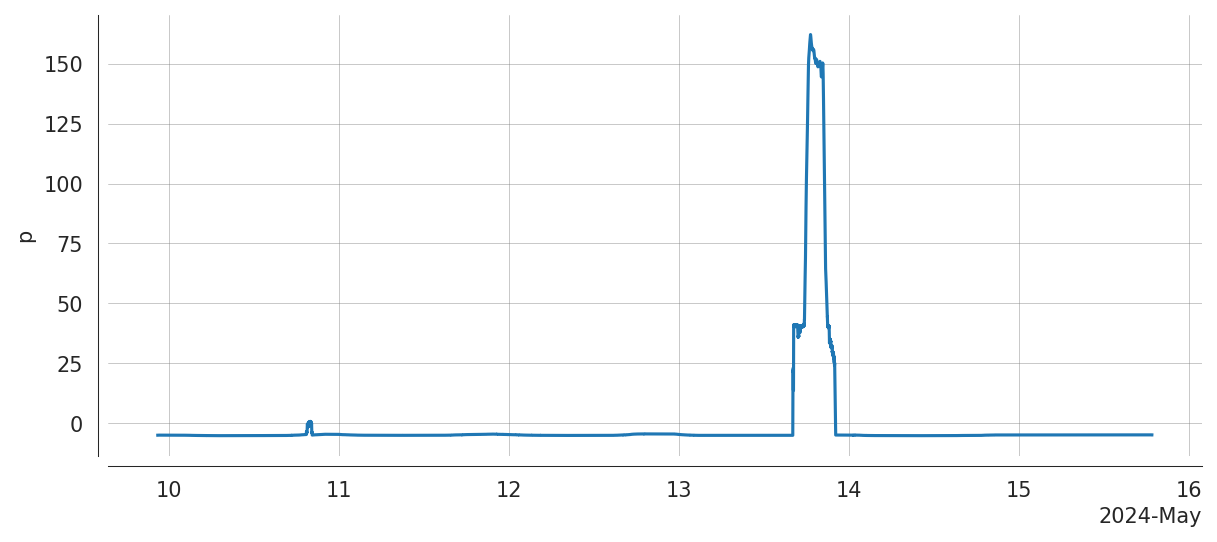

In [7]:
sbe.p.gv.plot()

<Axes: ylabel='t'>

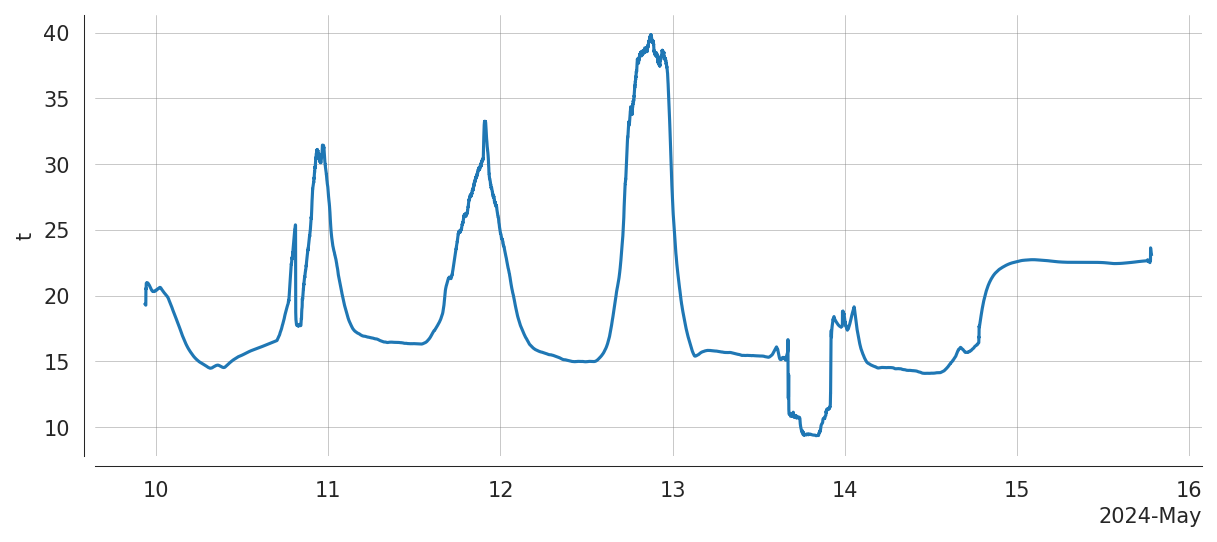

In [5]:
sbe.t.gv.plot()